# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, You'll practice your knowledge on correlation, autocorrelation and the ACF and PACF.

## Objectives

You will be able to:
- Understand correlation in Time Series
- Plot and discuss the autocorrelation function (ACF) for a time-series 
- Plot and discuss the partial autocorrelation function (PACF) for a time-series 
- Interpret ACF and PACF and Identify use cases both functions

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. First, import the necessary libraries for time series and plotting. Then import the data (in `exch_rates.csv`) and make sure it's set in the correct time series format with the `datetime` as the index.

In [44]:
import pandas as pd
from pandas import Series
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
xr = pd.read_csv("exch_rates.csv")
xr['Frequency'] = pd.to_datetime(xr['Frequency'])
xr.set_index('Frequency', inplace=True)

Plot the three exchange rates in one plot

Text(0.5, 1.0, 'Foreign Exchange Rates')

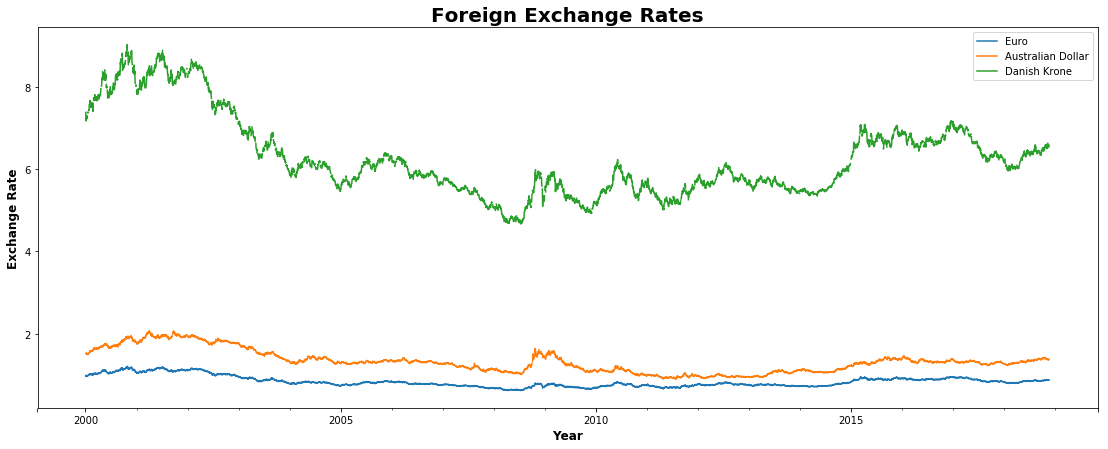

In [5]:
xr.plot(figsize=(19,7))
plt.xlabel('Year', fontweight='bold', fontsize=12)
plt.ylabel('Exchange Rate', fontweight='bold', fontsize=12)
plt.title('Foreign Exchange Rates', fontweight='bold', fontsize=20)

You can see that the EUR/USD and AUD/USD exchange rate are somewhere between rougly 0.5 and 2 between 2000 and 2018, where the Danish Krone is somewhere between roughly 4.5 and 9. Now let's look at the correlations between these time series.

In [6]:
xr.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


### What is your conclusion here? You might want to use outside resources to understand what's going on.

The exchange rates for Euro and the Australian dollar are highly correlated at 0.88 while the Euro and the Danish Krone display an even higher correlation of 0.99! Nearly a perfect correlation.

Next, look at the plots of the differenced series. Use subplots to plot them rather than creating just one plot.

Text(0.5, 0, 'Date')

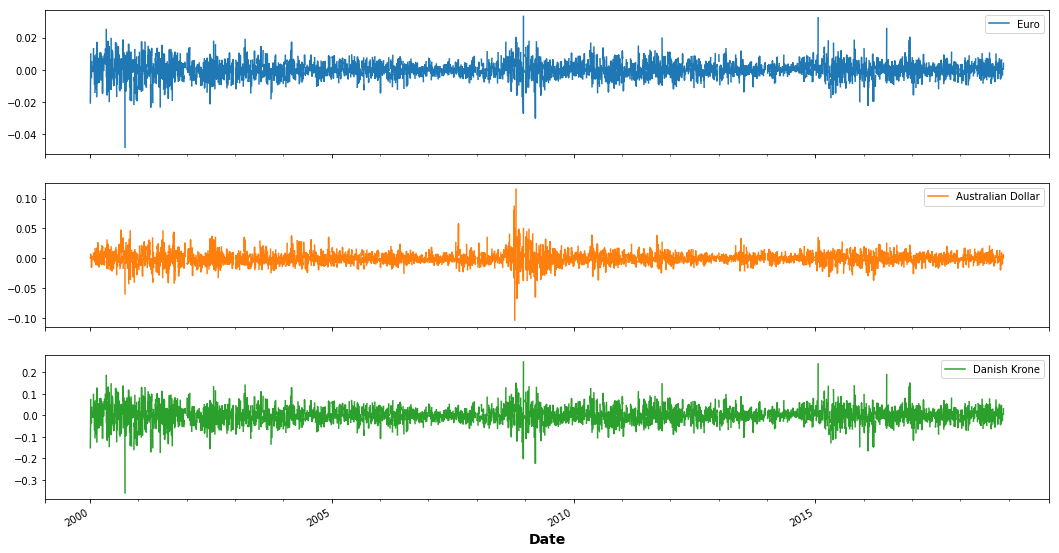

In [10]:
xr_diff = xr.diff(periods=1)
xr_diff.plot(figsize = (18,10), subplots=True, legend=True);
plt.xlabel('Date', fontweight='bold', fontsize=14)

In [11]:
# correlation
xr_diff.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.545369,0.999667
Australian Dollar,0.545369,1.000000,0.545133
Danish Krone,0.999667,0.545133,1.000000


### Explain what's going on

Now that we have differenced the currency series, we see a notable decrease in correlation between the Euro and Australian dollar as well as the Danish Krone and Australian dollar.

Next, let's look at the "lag 1 autocorrelation" for the EUR/USD exchange rate. Create a "lag 1 autocorrelation" series, plot the result, and look at the correlation coefficient.

In [13]:
eur = xr[['Euro']]
eur_shift_1 = eur.shift(periods=1)
eur_shift_1.head()

,Euro
Frequency,
2000-01-01,NaN
2000-01-02,NaN
2000-01-03,NaN
2000-01-04,0.991080
2000-01-05,0.970403


Text(0.5, 0, 'Date')

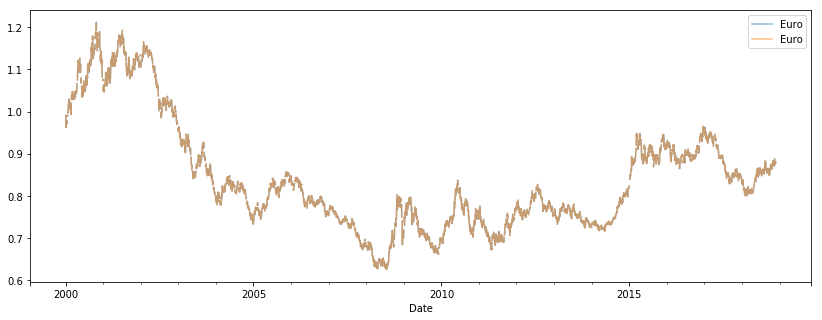

In [29]:
lag_1= pd.concat([eur_shift_1, eur], axis=1)
lag_1.plot(figsize=(14,5), alpha=0.5);
plt.xlabel('Date')

In [17]:
lag_1.corr()

,Euro,Euro
Euro,1.000000,0.999146
Euro,0.999146,1.000000


Repeat this, but for a "lag 5 autocorrelation"

Text(0.5, 0, 'Date')

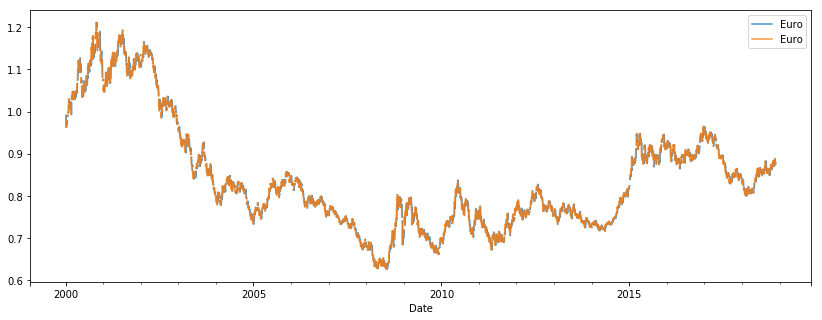

In [28]:
eur_shift_5 = eur.shift(periods=5)
lag_5 = pd.concat([eur_shift_5, eur], axis=1)
lag_5.plot(figsize=(14,5), alpha=0.8)
plt.xlabel('Date')

In [26]:
lag_5.corr()

,Euro,Euro
Euro,1.000000,0.997518
Euro,0.997518,1.000000


Text(0.5, 0, 'Date')

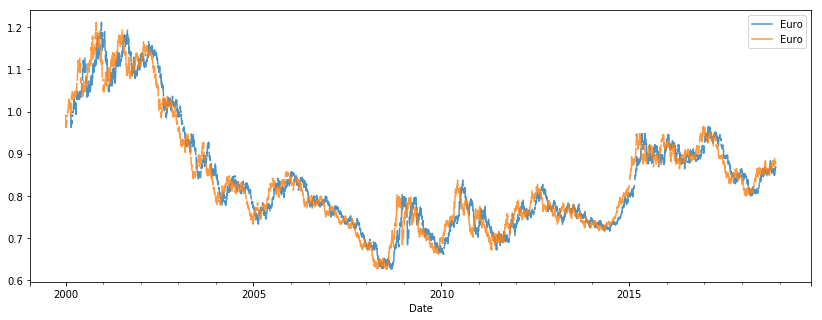

In [27]:
eur_shift_50 = eur.shift(periods=50)
lag_50= pd.concat([eur_shift_50, eur], axis=1)
lag_50.plot(figsize=(14,5), alpha=0.8);
plt.xlabel('Date')

In [24]:
lag_50.corr()

,Euro,Euro
Euro,1.000000,0.968321
Euro,0.968321,1.000000


### What's your conclusion here?

High autocorrelation is evident in these time series with lag of 1, 5, and 50 tested and visualized.

Knowing this, let's plot the ACF now.

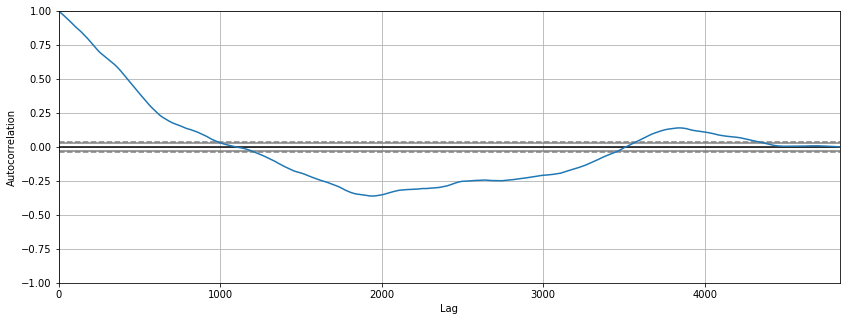

In [30]:
plt.figure(figsize=(14,5))
pd.plotting.autocorrelation_plot(eur.dropna());

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the Partial Autocorrelation Function.

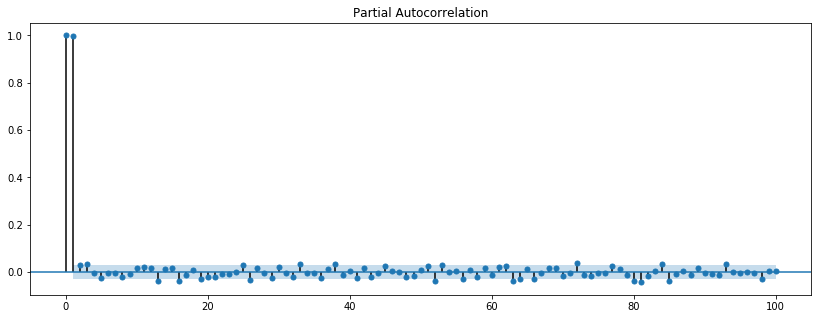

In [35]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5
plot_pacf(eur.dropna(), lags = 100);

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period lags, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for Random Walk series!

## The Airpassenger Data

Look at ACF and PACF for the airpassenger data and describe the result `passengers.csv`. Do this both for the differenced and regular series.

In [36]:
air_passenger = pd.read_csv('passengers.csv')
air_passenger.Month = pd.to_datetime(air_passenger.Month)
air_passenger.set_index('Month', inplace = True)

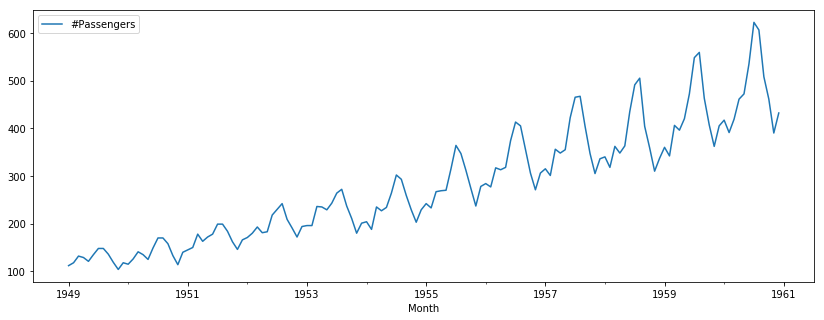

In [37]:
air_passenger.plot()

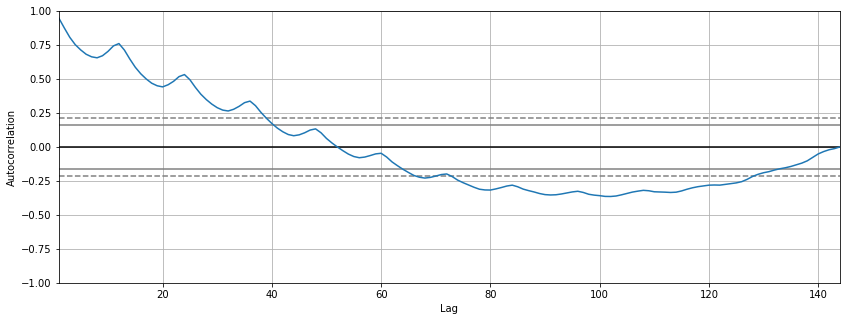

In [40]:
plt.figure(figsize=(14,5))
pd.plotting.autocorrelation_plot(air_passenger);

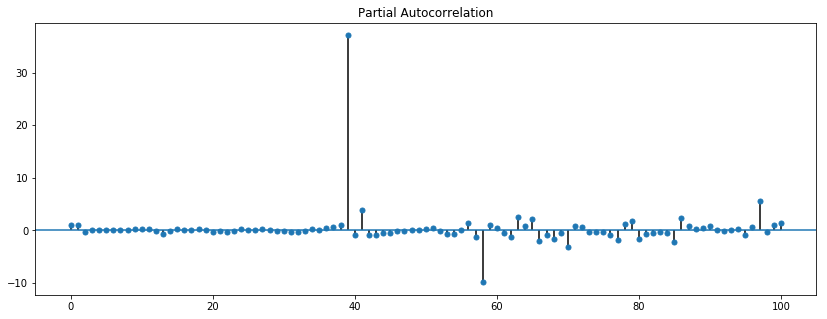

In [45]:
rcParams['figure.figsize'] = 14, 5
plot_pacf(air_passenger.dropna(), lags = 100);

In [50]:
air_passenger_diff = air_passenger.diff(periods=1)

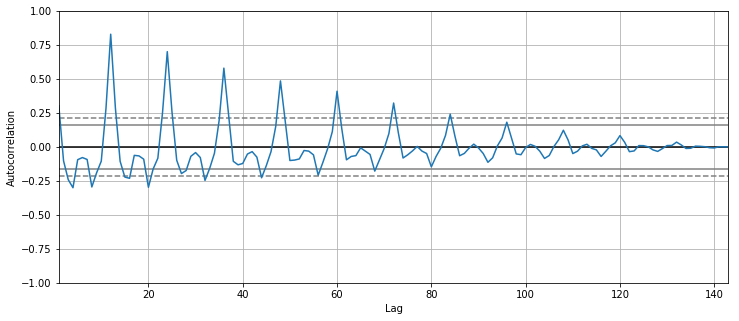

In [51]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(air_passenger_diff.dropna());

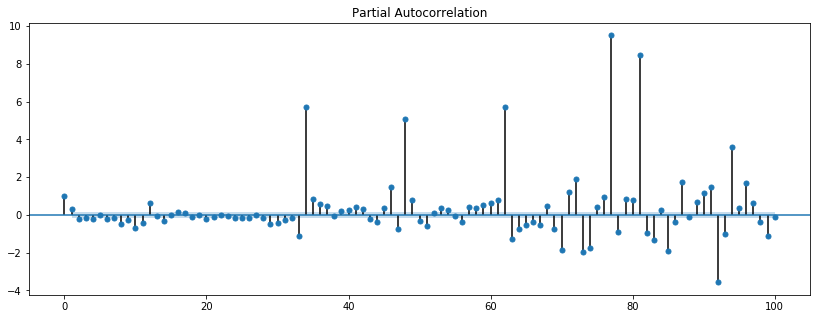

In [52]:
rcParams['figure.figsize'] = 14, 5
plot_pacf(air_passenger_diff.dropna(), lags = 100);

### Your conclusion here

## The NYSE data

Look at correlation and autocorrelation functions for the NYSE data ("NYSE_monthly.csv")

In [54]:
NYSE_monthly = pd.read_csv("NYSE_monthly.csv")
col_name= 'Month'
NYSE_monthly[col_name] = pd.to_datetime(NYSE_monthly[col_name])
NYSE_monthly.set_index(col_name, inplace=True)
NYSE_monthly.head()

,monthly_return
Month,
1961-01-01,0.082
1961-02-01,0.059
1961-03-01,0.050
1961-04-01,0.008
1961-05-01,0.042


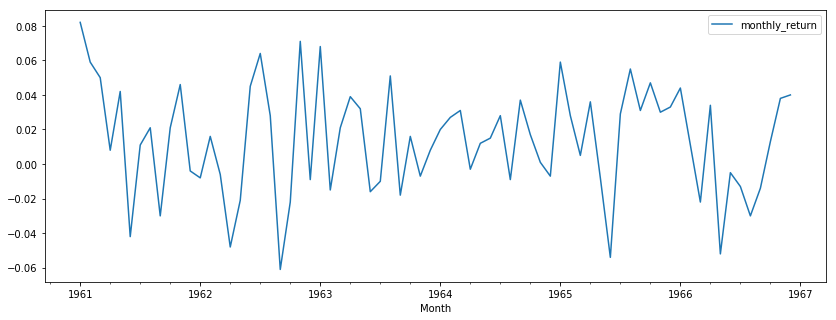

In [55]:
NYSE_monthly.plot()

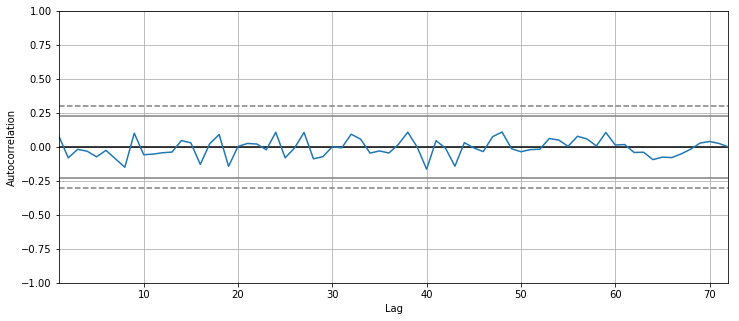

In [56]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(NYSE_monthly.dropna());

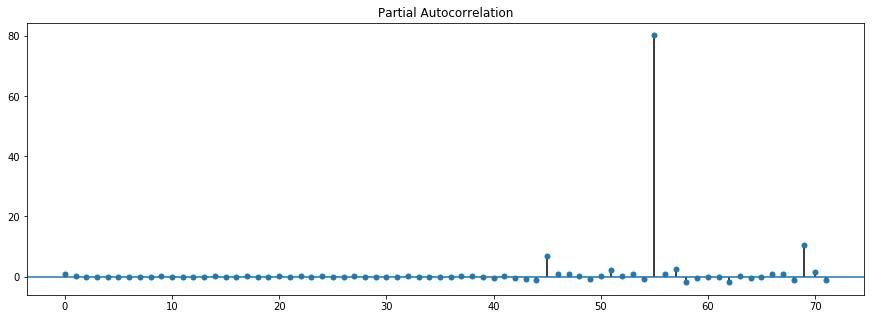

In [57]:
rcParams['figure.figsize'] = 15, 5
plot_pacf(NYSE_monthly, lags = 100);

## Your conclusion here

Relatively low lag near 0 for NYSE monthly data.



## Summary

Great, you've now been introduced to correlation, the ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!